# Ensemle Learning
<font size='3'>Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal 
predictive model. There are various techniques under ensemble learning which can use multiple algorithms or one algorithm multiple times in order to combine them & create one ultimate model. In case of random forest regression (However, Ensemble Methods do not only pertain to Decision Trees) , we take multiple regression decision trees and train each of these trees with a subset of the actual dataset. Then the test set is passed to each of these decision trees (here decision trees are the base learners) and the <b>average</b> of all of these trees is taken as the final prediction.</font>

Rather than making one model and hoping this model is the best/most accurate predictor we can make, ensemble methods take a myriad of models into account, and average those models to produce one final model.

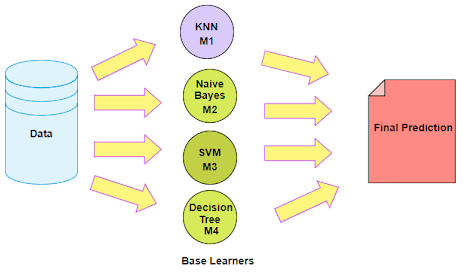

In [12]:
# An ensemble model may look like this:
Image('CAPTURE2.png',embed=True, width=600)

<font size='4'> <b>The ensemble method is applied to reduce bias & variance resulting in the stability and accuracy of the result. </b></font>

# Types of Ensemble Methods :

## 1. Bagging (or Bootstrap Aggregating)
<font size='3'> Bagging is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average. It combines Bootstrapping and Aggregation to form one ensemble model. Given a sample of data, multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples. After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor.</font>

In [29]:
from IPython.display import Image, YouTubeVideo

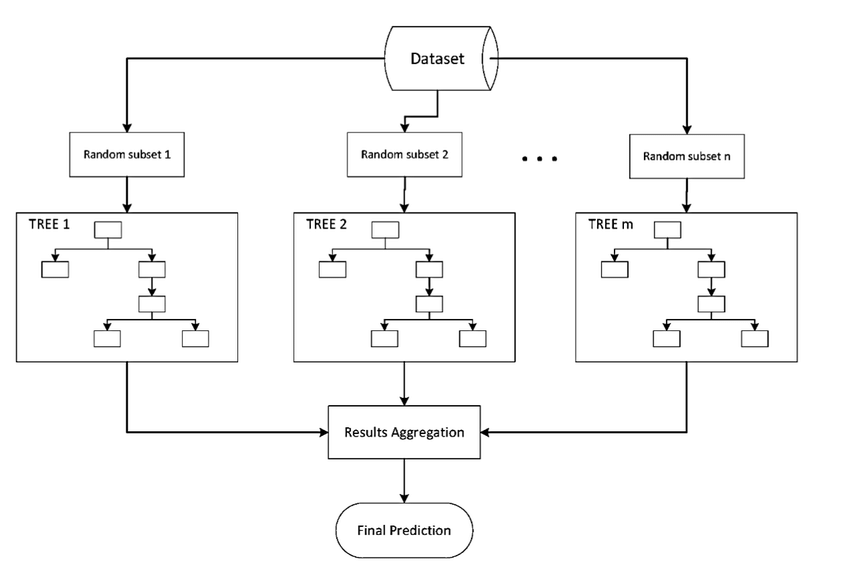

In [3]:
Image('CAPTURE.png',height=400, width=900,embed=True)

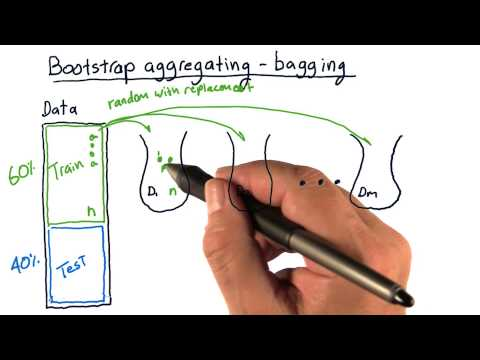

In [32]:
YouTubeVideo('2Mg8QD0F1dQ',width=600,height=400)

### 1.1 Random Forest
<font size='3'> Random Forest Models can be thought of as BAGGing, with a slight tweak. When deciding where to split and how to make decisions, BAGGed Decision Trees have the full disposal of features to choose from. Therefore, although the bootstrapped samples may be slightly different, the data is largely going to break off at the same features throughout each model. In contrary, Random Forest models decide where to split based on a random selection of features. Rather than splitting at similar features at each node throughout, Random Forest models implement a level of differentiation because each tree will split based on different features. This level of differentiation provides a greater ensemble to aggregate over, ergo producing a more accurate predictor

Similar to BAGGing, bootstrapped subsamples are pulled from a larger dataset. A decision tree is formed on each subsample. HOWEVER, the decision tree is split on different features (in this diagram the features are represented by shapes)</font>

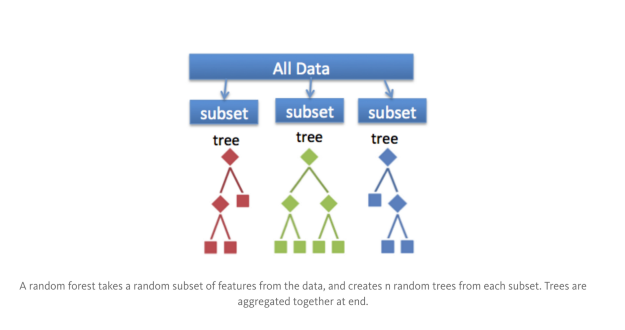

In [14]:
Image('CAPTURE3.png',embed=True)

In [5]:
# josh starmer's random forest playlist, pretty cool :
# https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&list=PLblh5JKOoLUIE96dI3U7oxHaCAbZgfhHk

In [1]:
# awesome article on ensemble learning that covers a few more types of ensemble techniques:
# https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/

## 2. Boosting
<font size='3'>Boosting is also a homogeneous weak learners’ model but works differently from Bagging. In this model, base learners learn sequentially and adaptively to improve model predictions of a learning algorithm.Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.</font>

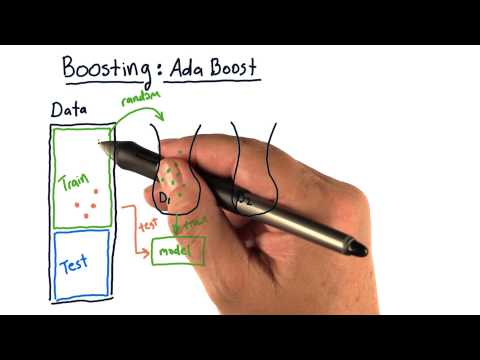

In [31]:
YouTubeVideo('GM3CDQfQ4sw', width=600,height=400)

In [3]:
# awesome article on 2 of the most common ensembling methods, bagging & boosting:
# https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

In [1]:
# In case of bagging and boosting, the ensemble models made using either of the 2 techniques are called 'homogeneous models'
# bcoz the base learners in these techniques use only 1 algorithm. There are other ensemble techniques which uses 
# multiple algorithms as shown in the 1st image of this notebook, and those ensemble models are called 'heterogenous models'

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [20]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [21]:
df_dummies.corr()

R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
State_Florida     0.105711        0.010493         0.205685  0.116244   
State_New York    0.039068        0.005145        -0.033670  0.031368   

                 State_Florida  State_New York  
R&D Spend             0.105711        0.039068  
Administration        0.010493        0.005145  
Marketing Spend       0.205685       -0.033670  
Profit                0.116244        0.031368  
State_Florida         1.000000       -0.492366  
State_New York       -0.492366        1.000000

In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [60]:
X = df.iloc[:, :-1]
X = pd.get_dummies(X, drop_first=True).values
y = df.iloc[:, -1]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
model = RandomForestRegressor(min_samples_split=5, min_samples_leaf=4)
model.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5)

In [95]:
model.score(X_test, Y_test) # slightly higher than sole DecisionTreeRegressor model

0.9047670489349127

In [96]:
model.predict([[43214,45621,86356,1,0]])

array([91649.47918016])

In [97]:
model.feature_importances_
#  The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance

array([0.96353928, 0.00034239, 0.03597217, 0.00001916, 0.000127  ])